In [3]:
!pip install -q kaggle

In [4]:
!mkdir ~/.kaggle #creating kaggle directory

The syntax of the command is incorrect.


In [3]:
!cp kaggle.json ~/.kaggle/  # copying json file to folder

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!chmod 600 ~/.kaggle/kaggle.json  # changing the permissions to json

'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
!kaggle datasets download -d bharadwaj6/kindle-reviews

c:\programdata\anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Traceback (most recent call last):
  File "c:\programdata\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\programdata\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\Scripts\kaggle.exe\__main__.py", line 5, in <module>
  File "c:\programdata\anaconda3\lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "c:\programdata\anaconda3\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\User\.kaggle. Or use the environment method.


In [7]:
!unzip kindle-reviews.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


#  Importing necessary libraries

In [8]:
import numpy as np # scientific computation
import pandas as pd # loading dataset file
import matplotlib.pyplot as plt # Visulization
import nltk  # Preprocessing our text
from nltk.corpus import stopwords # removing all the stop words
from nltk.stem.porter import PorterStemmer # stemming of words

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

# Load our dataset


In [9]:
#Load our dataset
df = pd.read_csv(r"kindle_reviews.csv")

# Top 5 Rows of Dataset

In [10]:
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [11]:
df.rename(columns={'asin':'ProductId', 'overall':'Score', 'reviewText':'Text', 'reviewerID':'UserId', 'summary':'Summary', 'unixReviewTime':'Time'}, inplace=True)

df.head()

,Unnamed: 0,ProductId,helpful,Score,Text,reviewTime,UserId,reviewerName,Summary,Time
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1388966400
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1396569600
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200


In [12]:
df.drop(['Unnamed: 0','helpful','reviewTime','reviewerName'], axis=1, inplace=True)

df.head()

,ProductId,Score,Text,UserId,Summary,Time
0,B000F83SZQ,5,I enjoy vintage books and movies so I enjoyed ...,A1F6404F1VG29J,Nice vintage story,1399248000
1,B000F83SZQ,4,This book is a reissue of an old one; the auth...,AN0N05A9LIJEQ,Different...,1388966400
2,B000F83SZQ,4,This was a fairly interesting read. It had ol...,A795DMNCJILA6,Oldie,1396569600
3,B000F83SZQ,5,I'd never read any of the Amy Brewster mysteri...,A1FV0SX13TWVXQ,I really liked it.,1392768000
4,B000F83SZQ,4,"If you like period pieces - clothing, lingo, y...",A3SPTOKDG7WBLN,Period Mystery,1395187200


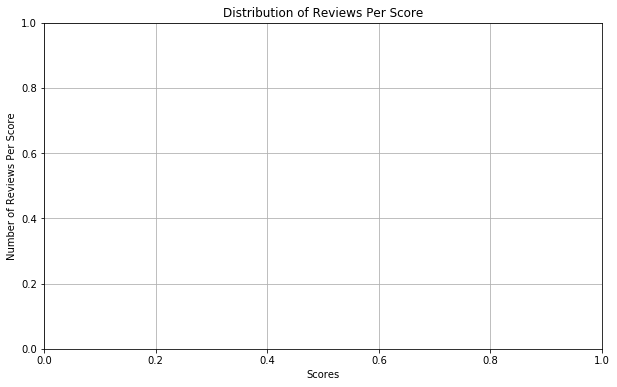

In [13]:
category_dist = df['Score'].value_counts()

plt.figure(figsize=(10,6))
my_colors = ['g', 'r', 'b', 'm', 'y']
#category_dist.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("Scores")
plt.ylabel("Number of Reviews Per Score")
plt.title("Distribution of Reviews Per Score")
plt.show()

In [14]:
df = df.loc[df['Score'] != 3]

df.shape

(886425, 6)

In [15]:
#give reviews with Score > 3 a positive rating and reviews with a score < 3 a negative rating
def partition(x):
    if x < 3:
        return 'Negative'
    else:
        return 'Positive'

actualScore = df['Score']
pos_neg = actualScore.map(partition)
df['Score'] = pos_neg

df.head()

,ProductId,Score,Text,UserId,Summary,Time
0,B000F83SZQ,Positive,I enjoy vintage books and movies so I enjoyed ...,A1F6404F1VG29J,Nice vintage story,1399248000
1,B000F83SZQ,Positive,This book is a reissue of an old one; the auth...,AN0N05A9LIJEQ,Different...,1388966400
2,B000F83SZQ,Positive,This was a fairly interesting read. It had ol...,A795DMNCJILA6,Oldie,1396569600
3,B000F83SZQ,Positive,I'd never read any of the Amy Brewster mysteri...,A1FV0SX13TWVXQ,I really liked it.,1392768000
4,B000F83SZQ,Positive,"If you like period pieces - clothing, lingo, y...",A3SPTOKDG7WBLN,Period Mystery,1395187200


In [16]:
df = df.head(10000) #considering only 50k rows

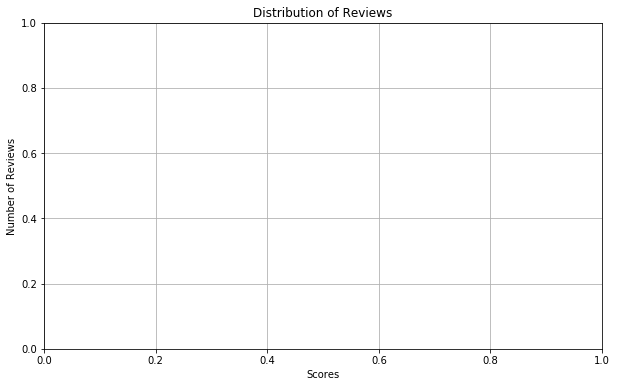

In [17]:
category_dist = df['Score'].value_counts()

plt.figure(figsize=(10,6))
my_colors = ['g', 'r']
#category_dist.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("Scores")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Reviews")
plt.show()

In [18]:
df[df['UserId']=='A3SPTOKDG7WBLN']

,ProductId,Score,Text,UserId,Summary,Time
4,B000F83SZQ,Positive,"If you like period pieces - clothing, lingo, y...",A3SPTOKDG7WBLN,Period Mystery,1395187200


In [19]:
#sorting data according to ProductId in ascending order
df = df.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [20]:
#deduplication of entries
df = df.drop_duplicates(subset={"ProductId","UserId","Time","Text"}, keep='first', inplace=False)
df.shape

(10000, 6)

In [21]:
#joining review description and summary into one col
df['reviewText']=df['Text']+" "+df['Summary']

In [22]:
df.head()

,ProductId,Score,Text,UserId,Summary,Time,reviewText
0,B000F83SZQ,Positive,I enjoy vintage books and movies so I enjoyed ...,A1F6404F1VG29J,Nice vintage story,1399248000,I enjoy vintage books and movies so I enjoyed ...
1,B000F83SZQ,Positive,This book is a reissue of an old one; the auth...,AN0N05A9LIJEQ,Different...,1388966400,This book is a reissue of an old one; the auth...
2,B000F83SZQ,Positive,This was a fairly interesting read. It had ol...,A795DMNCJILA6,Oldie,1396569600,This was a fairly interesting read. It had ol...
3,B000F83SZQ,Positive,I'd never read any of the Amy Brewster mysteri...,A1FV0SX13TWVXQ,I really liked it.,1392768000,I'd never read any of the Amy Brewster mysteri...
4,B000F83SZQ,Positive,"If you like period pieces - clothing, lingo, y...",A3SPTOKDG7WBLN,Period Mystery,1395187200,"If you like period pieces - clothing, lingo, y..."


In [23]:
df.drop(['ProductId','UserId','Time','reviewText'],axis=1,inplace=True)

In [24]:
df.drop(['Summary'],axis=1,inplace=True)

In [25]:
df.head()

,Score,Text
0,Positive,I enjoy vintage books and movies so I enjoyed ...
1,Positive,This book is a reissue of an old one; the auth...
2,Positive,This was a fairly interesting read. It had ol...
3,Positive,I'd never read any of the Amy Brewster mysteri...
4,Positive,"If you like period pieces - clothing, lingo, y..."


In [26]:
df.isna().sum()

Score    0
Text     0
dtype: int64

In [27]:
#since there is only one null value, replace it with blank space
df['Text'].fillna("",inplace = True)

In [28]:
df.isna().sum()

Score    0
Text     0
dtype: int64

In [29]:
df.Score.value_counts()

Positive    8826
Negative    1174
Name: Score, dtype: int64

In [30]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# EDA on Dataset

In [31]:
# Return the shape of data 
df.shape

(10000, 2)

In [32]:
# Return the n dimensions of data
df.ndim

2

In [33]:
# Return the size of data 
df.size

20000

In [34]:
#Returns the sum fo all na values
df.isna().sum() 

Score    0
Text     0
dtype: int64

In [36]:
#Give concise summary of a DataFrame
#df.info()


In [37]:
# top 5 rows of the dataframe
df.head() 

,Score,Text
0,Positive,I enjoy vintage books and movies so I enjoyed ...
1,Positive,This book is a reissue of an old one; the auth...
2,Positive,This was a fairly interesting read. It had ol...
3,Positive,I'd never read any of the Amy Brewster mysteri...
4,Positive,"If you like period pieces - clothing, lingo, y..."


In [38]:
# bottom 5 rows of the dataframe
df.tail()

,Score,Text
11616,Positive,Four years at West Point usually provide offic...
11613,Positive,"Kept me on the edge of my seat, nice action se..."
11625,Positive,For more than 50 years a secret organization o...
11619,Positive,Another great read from Bob Mayer in the same ...
11626,Negative,"This book has a rather farfetched, but interes..."


# Let’s Visualize the Column label_num

In [53]:
df["Score"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2), ('Positive', 'Negative'),rotation=0);

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [40]:
#split the data into x(independent variable)
x=df.iloc[:,1].values

In [41]:
x

array(["I enjoy vintage books and movies so I enjoyed reading this book.  The plot was unusual.  Don't think killing someone in self-defense but leaving the scene and the body without notifying the police or hitting someone in the jaw to knock them out would wash today.Still it was a good read for me.",
       "This book is a reissue of an old one; the author was born in 1910. It's of the era of, say, Nero Wolfe. The introduction was quite interesting, explaining who the author was and why he's been forgotten; I'd never heard of him.The language is a little dated at times, like calling a gun a &#34;heater.&#34;  I also made good use of my Fire's dictionary to look up words like &#34;deshabille&#34; and &#34;Canarsie.&#34; Still, it was well worth a look-see.",
       "This was a fairly interesting read.  It had old- style terminology.I was glad to get  to read a story that doesn't have coarse, crasslanguage.  I read for fun and relaxation......I like the free ebooksbecause I can check 

# Cleaning The Text

In [42]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
#create an object for wordnet lemmatizer
wordnet=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
import re
corpus = []
length = len(df)


In [44]:
len(df)

10000

In [45]:
len(corpus)

0

In [50]:
# no of rows to clean 
for i in range(len(x)):
    #replacing punctuations and numbers using re library 
    temp=re.sub('[^a-zA-Z]',' ',x[i])
     # convert all text to lower cases
    temp=temp.lower()
    # split to array(default delimiter is " ") 
    temp=temp.split()
    #creating WordNetLemmatizer object to take main lemma of each word
    wordnet = WordNetLemmatizer()
    #loop for leammatization each word in string array at ith row 
    temp=[wordnet.lemmatize(word) for word in temp if not word in set(
            stopwords.words('english'))]
    #rejoin all string array elements to create back into a string 
    temp=' '.join(temp)
    #append each string to create array of clean text 
    corpus.append(temp)

In [51]:
# for i in range(0,length):
#     text = re.sub("[^a-zA-Z0-9]"," ",df["text"][i])
#     text = text.lower()
#     text = text.split()
#     pe = PorterStemmer()
#     stopword = stopwords.words("english")
#     text = [pe.stem(word) for word in text if not word in set(stopword)]
#     text = " ".join(text)
#     corpus.append(text)


In [52]:
corpus

['enjoy vintage book movie enjoyed reading book plot unusual think killing someone self defense leaving scene body without notifying police hitting someone jaw knock would wash today still good read',
 'book reissue old one author born era say nero wolfe introduction quite interesting explaining author forgotten never heard language little dated time like calling gun heater also made good use fire dictionary look word like deshabille canarsie still well worth look see',
 'fairly interesting read old style terminology glad get read story coarse crasslanguage read fun relaxation like free ebooksbecause check writer decide intriguing innovative enough command englishthat convey story without crude language',
 'never read amy brewster mystery one really hooked',
 'like period piece clothing lingo enjoy mystery author guessing least way',
 'beautiful depth character description make like fast pacing movie pity mr merwin write instead amy brewster mystery',
 'enjoyed one tho sure called amy 

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=50000)
X = cv.fit_transform(corpus).toarray()

In [52]:
x=X[:50000]

In [53]:
len(x)

10000

In [54]:
# Extracting dependent variable from the dataset
y = pd.get_dummies(df['Score'])
y = y.iloc[:, 1].values


In [55]:
len(y)

10000

# Dumping the CV for future use

In [56]:
import pickle ## importing pickle used for dumping models
pickle.dump(cv, open('cv.pkl', 'wb')) ## saving to into cv.pkl file

# Modeling and Training

In [57]:
from sklearn.model_selection import train_test_split

# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (8000, 24052)
Number transactions y_train dataset:  (8000,)
Number transactions X_test dataset:  (2000, 24052)
Number transactions y_test dataset:  (2000,)


# Creating a model using Multinomial NaiveBayes Without handling the imbalanced class

In [58]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [59]:
#Fitting the model to the training sets
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Prediction


In [60]:
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

# Evaluating Model

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm)
print('Accuracy Score Is:- ' ,score*100)


[[  93  161]
 [  39 1707]]
Accuracy Score Is:-  90.0


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.37      0.48       254
           1       0.91      0.98      0.94      1746

    accuracy                           0.90      2000
   macro avg       0.81      0.67      0.71      2000
weighted avg       0.89      0.90      0.89      2000



**Using SMOTE Algorithm**

In [94]:
#pip install imblearn.over_sampling

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement imblearn.over_sampling (from versions: none)
ERROR: No matching distribution found for imblearn.over_sampling


In [54]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
#pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


NameError: name 'y_train' is not defined

In [55]:

model.fit(X_train_res, y_train_res.ravel())
predictions1 = model.predict(X_test)

# print classification report
print(classification_report(y_test, predictions1))


NameError: name 'model' is not defined

In [ ]:
cm = confusion_matrix(y_test, predictions1)
score = accuracy_score(y_test,predictions1)
print(cm)
print('Accuracy Score Is:- ' ,score*100)


# Saving our model

In [ ]:
import pickle
pickle.dump(model,open("amazon.pkl", "wb"))

# Test our save model by loading it and testing on test data.

In [ ]:
loaded_model = pickle.load(open("amazon.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

In [ ]:
loaded_model.predict(X_test)

# Prediction for a new review

In [ ]:
def new_review(new_review):
  new_review = new_review
  new_review = re.sub('[^a-zA-Z]', ' ', new_review)
  new_review = new_review.lower()
  new_review = new_review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  new_review = [ps.stem(word) for word in new_review if not word in   set(all_stopwords)]
  new_review = ' '.join(new_review)
  new_corpus = [new_review]
  new_X_test = cv.transform(new_corpus).toarray()
  new_y_pred = loaded_model.predict(new_X_test)
  return new_y_pred
new_review = new_review(str(input("Enter new review...")))
if new_review[0]==True:
  print("Positive review")
else :
  print("Negative review")



In [ ]:
def new_review(new_review):
  new_review = new_review
  new_review = re.sub('[^a-zA-Z]', ' ', new_review)
  new_review = new_review.lower()
  new_review = new_review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  new_review = [ps.stem(word) for word in new_review if not word in   set(all_stopwords)]
  new_review = ' '.join(new_review)
  new_corpus = [new_review]
  new_X_test = cv.transform(new_corpus).toarray()
  new_y_pred = loaded_model.predict(new_X_test)
  return new_y_pred
new_review = new_review(str(input("Enter new review...")))
if new_review[0]==True:
  print("Positive review")
else :
  print("Negative review")

